In [1]:
import requests
import json

import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

In [2]:
query = "http://uoweb3.ncl.ac.uk/api/v1.1/sensors/json/?theme=Air+Quality&bbox_p1_x=-1.988472&bbox_p1_y=54.784364&bbox_p2_x=-1.224922&bbox_p2_y=55.190148"
response = requests.get(query)
response

<Response [200]>

In [3]:
jresponse = json.loads(response.content)
sensors = jresponse["sensors"]
sensors

[{'Sensor Centroid Latitude': 54.9656558649,
  'Ground Height Above Sea Level': 31.4099998474,
  'Broker Name': 'Emote Air Quality Sensor',
  'Sensor Height Above Ground': 2.0,
  'Sensor Name': 'PER_EMOTE_1505',
  'Sensor Centroid Longitude': -1.6042745895,
  'Location (WKT)': 'POINT (-1.60427458952532 54.9656558649474)',
  'Raw ID': '672',
  'Third Party': False},
 {'Sensor Centroid Latitude': 54.965771586,
  'Ground Height Above Sea Level': 30.6900005341,
  'Broker Name': 'Emote Air Quality Sensor',
  'Sensor Height Above Ground': 2.0,
  'Sensor Name': 'PER_EMOTE_1504',
  'Sensor Centroid Longitude': -1.6041831626,
  'Location (WKT)': 'POINT (-1.6041831625827 54.9657715859759)',
  'Raw ID': '671',
  'Third Party': False},
 {'Sensor Centroid Latitude': 54.9614030228,
  'Ground Height Above Sea Level': 60.1800003052,
  'Broker Name': 'Emote Air Quality Sensor',
  'Sensor Height Above Ground': 2.0,
  'Sensor Name': 'PER_EMOTE_1310',
  'Sensor Centroid Longitude': -1.6063334215,
  'Locat

In [5]:
df = pd.DataFrame(sensors)
df.head()

,Sensor Centroid Latitude,Ground Height Above Sea Level,Broker Name,Sensor Height Above Ground,Sensor Name,Sensor Centroid Longitude,Location (WKT),Raw ID,Third Party
0,54.965656,31.410000,Emote Air Quality Sensor,2.0,PER_EMOTE_1505,-1.604275,POINT (-1.60427458952532 54.9656558649474),672,False
1,54.965772,30.690001,Emote Air Quality Sensor,2.0,PER_EMOTE_1504,-1.604183,POINT (-1.6041831625827 54.9657715859759),671,False
2,54.961403,60.180000,Emote Air Quality Sensor,2.0,PER_EMOTE_1310,-1.606333,POINT (-1.60633342152779 54.9614030228397),670,False
3,54.961703,58.160000,Emote Air Quality Sensor,2.0,PER_EMOTE_1309,-1.605718,POINT (-1.60571793847102 54.961702619894),669,False
4,54.961012,62.160000,Emote Air Quality Sensor,2.0,PER_EMOTE_1308,-1.606001,POINT (-1.6060009439146 54.9610121575041),668,False


In [11]:
gdf = gpd.GeoDataFrame(df,
                       geometry=gpd.points_from_xy(df["Sensor Centroid Longitude"],
                                                   df["Sensor Centroid Latitude"]),
                       crs={'init': 'epsg:4326'})

# Convert to British National Grid CRS (same as ONS data)
gdf = gdf.to_crs({'init': 'epsg:27700'})

# remove duplicate column - available as "geometry"
gdf.drop("Location (WKT)", inplace=True, axis=1)

gdf.head()

/Users/jroberts/anaconda3/envs/spatial-inequality/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,Sensor Centroid Latitude,Ground Height Above Sea Level,Broker Name,Sensor Height Above Ground,Sensor Name,Sensor Centroid Longitude,Raw ID,Third Party,geometry
0,54.965656,31.410000,Emote Air Quality Sensor,2.0,PER_EMOTE_1505,-1.604275,672,False,POINT (425434.322 563519.232)
1,54.965772,30.690001,Emote Air Quality Sensor,2.0,PER_EMOTE_1504,-1.604183,671,False,POINT (425440.103 563532.142)
2,54.961403,60.180000,Emote Air Quality Sensor,2.0,PER_EMOTE_1310,-1.606333,670,False,POINT (425305.167 563045.229)
3,54.961703,58.160000,Emote Air Quality Sensor,2.0,PER_EMOTE_1309,-1.605718,669,False,POINT (425344.389 563078.790)
4,54.961012,62.160000,Emote Air Quality Sensor,2.0,PER_EMOTE_1308,-1.606001,668,False,POINT (425326.700 563001.853)


In [18]:
# Get sensors in Newcastle upon tyne local authority only

# Get Newcastle upon tyne LA geometry
la = gpd.read_file("data/Local_Athority_Districts_December_2018_Boundaries_GB_BFC/Local_Athority_Districts_December_2018_Boundaries_GB_BFC.shp")
tyne_la = la[la["lad18nm"] == "Newcastle upon Tyne"].iloc[0]


gdf = gdf[gdf.intersects(tyne_la["geometry"])]

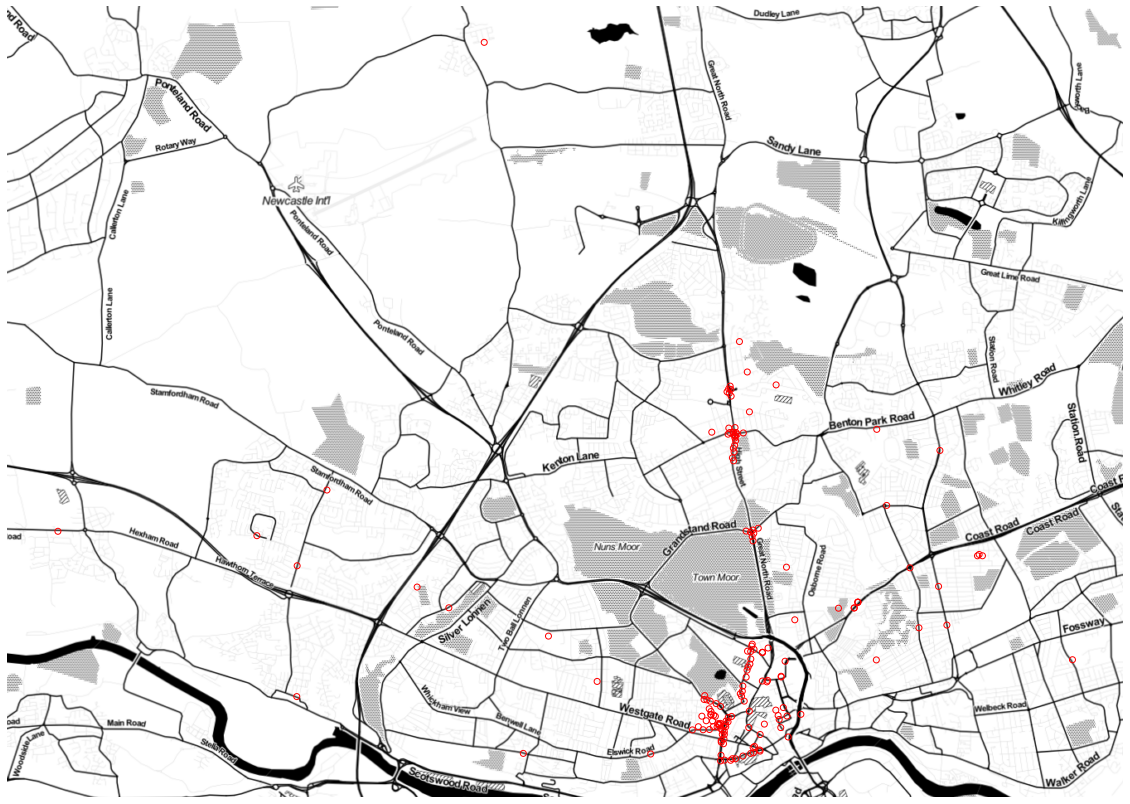

In [40]:
ax = gdf.plot(figsize=(20,20), facecolor='none', edgecolor='red')
ctx.add_basemap(ax,
                url="http://a.tile.stamen.com/toner/{z}/{x}/{y}.png",
                crs=gdf.crs)
ax.set_axis_off()
# url="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png"


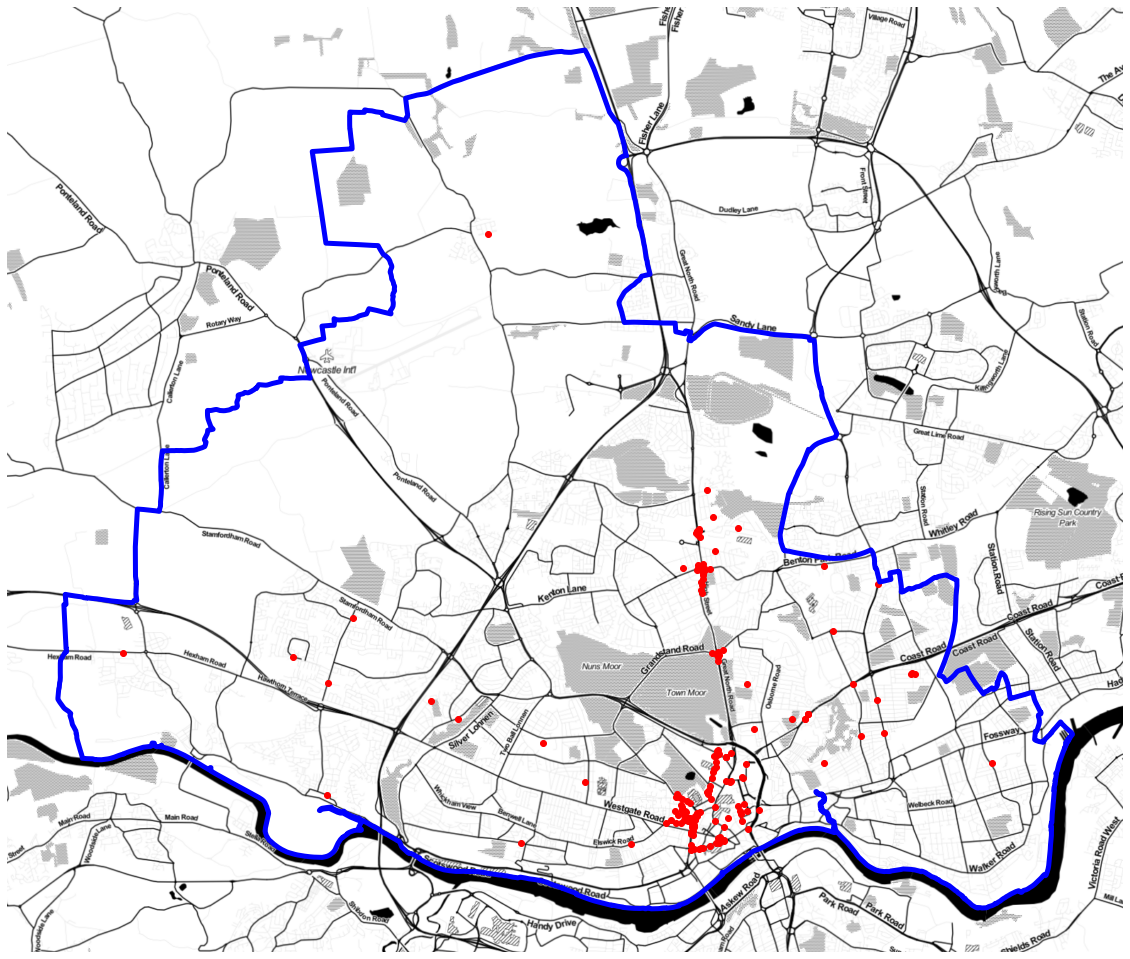

In [39]:
ax = plt.figure(figsize=(20,20)).gca()
x,y = tyne_la["geometry"].exterior.xy
ax.plot(x,y, 'blue', linewidth=5)
gdf.plot(ax=ax, edgecolor='red', facecolor='red')
ctx.add_basemap(ax,
                url="http://a.tile.stamen.com/toner/{z}/{x}/{y}.png",
                crs=gdf.crs)
ax.set_axis_off()
